In [1]:
%pylab inline
from wallet.util.analysis import Analysis
domestic_large = ['SCHX','IVV','SPYG','SCHG','SCHV','VTV','SPYD']
domestic_mid = ['SCHK','VONE','SCHM','VO','VOT','VOE']
domestic_small = ['SCHA','SPSM','VBK','VBR','DES','SMLV']
domestic = domestic_large + domestic_mid + domestic_small
international_developed = ['SPDW','SCHF','EFG','IVLU','SCZ','SCHC','HDEF','EFAV']
international_others = ['IEUR','VPL','SCHE','SPEM']
international = international_developed + international_others
bond = ['ICVT','EMLC','HYLB','IGLB','MLN','VGLT','SCHP']
assets = ['GLTR','GLDM','SIVR','DBA','DBO','SCHH','USRT']
ana = Analysis(domestic + international + bond + assets, 50, 5)
print(ana)
stats0 = ana.screen()

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


from 2019-12-10 to 2020-02-28 - 45 symbols


In [2]:
stats0.loc[{*domestic} & {*stats0.index}].sort_values('shrp', ascending=False)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHG,50.0,0.042870,0.702018,-2.573453,0.031694,0.306430,0.391539,0.721955,0.049762,-0.573509,12.898180,-2.536391
SPYG,50.0,0.021141,0.683571,-2.529542,0.026967,0.272426,0.344084,0.719718,0.019318,-1.589808,12.689022,-2.476322
VOT,50.0,0.004452,0.659281,-2.457327,-0.030283,0.262476,0.329994,0.587656,-0.005285,-3.150536,12.335033,-2.600079
VBK,50.0,-0.029284,0.648134,-2.446614,-0.072115,0.194308,0.304096,0.550801,-0.057428,-4.805152,12.169487,-2.493762
SCHX,50.0,-0.034468,0.652245,-2.455206,-0.017523,0.205295,0.275212,0.633974,-0.065013,-4.867903,12.587927,-2.575555
VONE,50.0,-0.037046,0.653277,-2.473436,-0.019988,0.197658,0.291558,0.614098,-0.068857,-5.074759,12.690457,-2.600627
SCHK,50.0,-0.037318,0.652945,-2.450519,-0.012826,0.197925,0.282159,0.619808,-0.069309,-5.201391,12.740379,-2.592443
IVV,50.0,-0.043037,0.657512,-2.467531,-0.031125,0.191123,0.277236,0.642254,-0.077524,-5.567078,12.936919,-2.557050
VO,50.0,-0.050619,0.652293,-2.528435,-0.037969,0.181231,0.277665,0.467331,-0.089768,-6.397878,12.948950,-2.685296


In [3]:
stats0.loc[{*international} & {*stats0.index}].sort_values('shrp', ascending=False)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SPEM,50.0,-0.082641,0.552734,-1.360777,-0.376029,0.108570,0.270644,0.794725,-0.163872,-4.072330,11.668828,-0.862056
SCHE,50.0,-0.094769,0.578416,-1.369268,-0.442051,0.114662,0.295227,0.873250,-0.177564,-4.313135,12.260805,-0.815335
EFG,50.0,-0.097431,0.514414,-1.760739,-0.163920,0.047487,0.198252,0.478656,-0.204831,-5.883334,10.603498,-1.946650
EFAV,50.0,-0.083399,0.410169,-1.608773,-0.082799,0.041637,0.144153,0.306438,-0.222678,-6.180757,9.148515,-2.433071
IEUR,50.0,-0.118896,0.559805,-2.091710,-0.161423,0.022462,0.193307,0.578602,-0.226565,-7.092683,11.524683,-2.169817
SCHF,50.0,-0.125967,0.513926,-1.809095,-0.173160,0.000000,0.162940,0.501745,-0.260551,-7.348253,11.313009,-1.906291
SPDW,50.0,-0.127090,0.515593,-1.854745,-0.181053,0.012649,0.161931,0.487086,-0.261885,-7.617742,11.548143,-1.982504
SCHC,50.0,-0.152288,0.560394,-2.123396,-0.228613,0.023200,0.189315,0.421926,-0.285913,-9.482596,13.352440,-2.144257
HDEF,50.0,-0.144575,0.489148,-1.897798,-0.203671,-0.019429,0.096279,0.622475,-0.311790,-8.255656,12.163792,-1.976178


In [4]:
stats0.loc[{*bond,*assets} & {*stats0.index}].sort_values('shrp', ascending=False)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
MLN,50.0,0.081834,0.095818,-0.085938,0.037638,0.070251,0.118955,0.351298,0.771232,3.931138,0.522094,0.930852
IGLB,50.0,0.097684,0.119829,-0.191644,0.012596,0.093650,0.185810,0.310932,0.748959,6.002753,1.468920,-0.176993
SCHP,50.0,0.058565,0.077266,-0.083315,-0.002838,0.054593,0.127851,0.204209,0.655253,3.289390,0.933773,0.061802
GLDM,50.0,0.201599,0.320919,-0.806254,0.023100,0.172268,0.380980,0.945273,0.603462,7.734429,4.894257,-0.195741
GLTR,50.0,0.243934,0.412059,-1.194391,-0.030481,0.218747,0.454323,1.119845,0.572727,9.185210,6.026075,-0.350177
VGLT,50.0,0.188563,0.322801,-0.448049,-0.054984,0.152887,0.406848,0.964734,0.559560,12.288168,2.554039,0.511897
ICVT,50.0,0.107127,0.489125,-1.680673,0.067817,0.254661,0.381117,0.555353,0.202792,4.051710,8.292111,-2.379280
SIVR,50.0,0.097665,0.551394,-2.097583,-0.168818,0.069617,0.433289,1.040724,0.162731,-0.556932,11.117258,-0.992674
USRT,50.0,0.030350,0.587620,-2.621279,-0.072240,0.125481,0.351217,0.678649,0.038143,-6.716523,12.547266,-2.889044


In [ ]:
########################################

In [ ]:
ana.setup_mask({*domestic} & {*stats0.index})
ana.optimize_iteration([30], max_count=2, additions=['SCHG','SCHA'])

In [ ]:
ana.setup_mask({'SCHG',*domestic_small} & {*stats0.index})
s = ana.data.rolling(5).mean().pct_change().corr().loc['SCHG'].sort_values()
print(s[s < .98])
stats0.loc[['SCHG',*s[s < .98].index]].sort_values('shrp', ascending=False)

In [ ]:
c = 1.037690/0.305054*0.809087
c/(c+1)*30

In [ ]:
ana.graph({'SCHG':24,'SCHA':6})

In [ ]:
########################################

In [ ]:
ana.setup_mask({*international} & {*stats0.index})
ana.optimize_iteration([15], max_count=2, additions=['IEUR','EFAV'])

In [ ]:
ana.graph({'IEUR':5,'EFAV':10})

In [ ]:
########################################

In [ ]:
ana.setup_mask({*bond,*assets} & {*stats0.index})
ana.optimize_iteration([10], max_count=2, additions=['IGLB','ICVT'])

In [ ]:
ana.graph({'IGLB':6,'ICVT':4})

In [ ]:
########################################

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
IGLB,50.0,0.097684,0.119829,-0.191644,0.012596,0.093650,0.185810,0.310932,0.748959,6.002753,1.468920,-0.176993
SCHP,50.0,0.058565,0.077266,-0.083315,-0.002838,0.054593,0.127851,0.204209,0.655253,3.289390,0.933773,0.061802
VGLT,50.0,0.188563,0.322801,-0.448049,-0.054984,0.152887,0.406848,0.964734,0.559560,12.288168,2.554039,0.511897
ICVT,50.0,0.107127,0.489125,-1.680673,0.067817,0.254661,0.381117,0.555353,0.202792,4.051710,8.292111,-2.379280
Portfolio,50.0,0.056405,0.264558,-1.002956,0.066419,0.130918,0.181010,0.273785,0.183206,2.276341,4.974118,-2.829801
SCHG,50.0,0.042870,0.702018,-2.573453,0.031694,0.306430,0.391539,0.721955,0.049762,-0.573509,12.898180,-2.536391
SCHA,50.0,-0.106865,0.659005,-2.545757,-0.125496,0.062209,0.256972,0.495538,-0.174204,-8.885405,13.154155,-2.449906
EFAV,50.0,-0.083399,0.410169,-1.608773,-0.082799,0.041637,0.144153,0.306438,-0.222678,-6.180757,9.148515,-2.433071
IEUR,50.0,-0.118896,0.559805,-2.091710,-0.161423,0.022462,0.193307,0.578602,-0.226565,-7.092683,11.524683,-2.169817


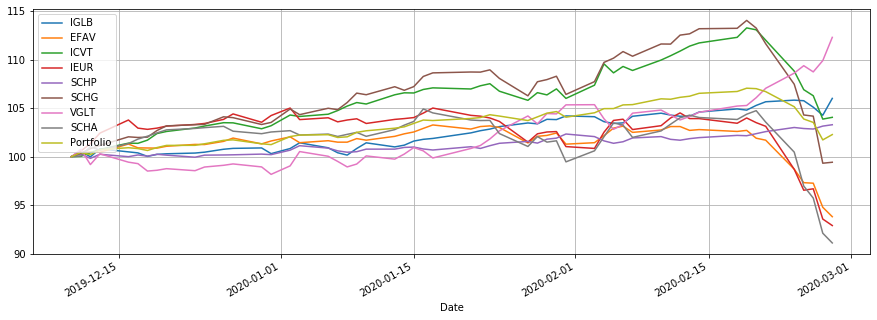

In [16]:
ana.graph({'SCHG':27,'SCHA':7,'IEUR':5,'EFAV':11,'VGLT':25,'SCHP':15,'IGLB':6,'ICVT':4})